### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

using the the following dataset, follow the instructions as provided - https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy

•	Showcase sustainable energy indicators and other useful factors. 
•	Dive into vital aspects such as electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth
•	 compare nations, track progress towards Sustainable Development Goal 7, and gain profound insights into global energy consumption patterns over time.

### Step 1: Load and Explore the Dataset

In [107]:
#First, let's load the dataset and examine its structure.

# Load the dataset
df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

In [108]:
# Display the first few rows of the dataset
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [109]:
# Describe the columns
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


### Key Features:

Entity: The name of the country or region for which the data is reported.

Year: The year for which the data is reported, ranging from 2000 to 2020.

Access to electricity (% of population): The percentage of population with access to electricity.

Access to clean fuels for cooking (% of population): The percentage of the population with primary reliance on clean fuels.

Renewable-electricity-generating-capacity-per-capita: Installed Renewable energy capacity per person

Financial flows to developing countries (US $): Aid and assistance from developed countries for clean energy projects.

Renewable energy share in total final energy consumption (%): Percentage of renewable energy in final energy consumption.

Electricity from fossil fuels (TWh): Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.

Electricity from nuclear (TWh): Electricity generated from nuclear power in terawatt-hours.

Electricity from renewables (TWh): Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.

Low-carbon electricity (% electricity): Percentage of electricity from low-carbon sources (nuclear and renewables).

Primary energy consumption per capita (kWh/person): Energy consumption per person in kilowatt-hours.

Energy intensity level of primary energy (MJ/$2011 PPP GDP): Energy use per unit of GDP at purchasing power parity.

Value_co2_emissions (metric tons per capita): Carbon dioxide emissions per person in metric tons.

Renewables (% equivalent primary energy): Equivalent primary energy that is derived from renewable sources.

GDP growth (annual %): Annual GDP growth rate based on constant local currency.

GDP per capita: Gross domestic product per person.

Density (P/Km2): Population density in persons per square kilometer.

Land Area (Km2): Total land area in square kilometers.

Latitude: Latitude of the country's centroid in decimal degrees.

Longitude: Longitude of the country's centroid in decimal degrees.

In [110]:
# Rename Columns to have meaningful names

df_working_copy = df.rename(columns={"Entity":"Country",
                                     "Access to electricity (% of population)": "Electricity_Access_Percent",
                                     "Access to clean fuels for cooking": "CleanFuel_Access_Percent", 
                                     "Renewable-electricity-generating-capacity-per-capita": "Renewable_Electricity_PerPerson", 
                                     "Financial flows to developing countries (US $)" : "Financial_Aids_Dollars",
                                     "Renewables (% equivalent primary energy)" :"Renewable_Energy_Consumption_AgainstTotalEnergy_Percent",
                                     "Electricity from fossil fuels (TWh)" : "Electricity_from_Fossil_Fuels_TWH",
                                     "Electricity from nuclear (TWh)" : "Electricity_from_NuclearPoer_TWh",
                                     "Electricity from renewables (TWh)" : "Electricity_from_RenewableSource_TWh",
                                     "Low-carbon electricity (% electricity)" : "LowCarbon_Electricity_Percent",
                                     "Primary energy consumption per capita (kWh/person)" : "Primary_Energy_Consumption_PerPerson_kWh", 
                                     "Value_co2_emissions_kt_by_country" : "Co2_Emission_PerPerson_MetricTon",
                                     "gdp_growth":"Annual_GDP_Growth_Percent", 
                                     "gdp_per_capita":"GDP_PerPerson_Dollars"})
df_working_copy.describe()

,Year,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Financial_Aids_Dollars,Renewable energy share in the total final energy consumption (%),Electricity_from_Fossil_Fuels_TWH,Electricity_from_NuclearPoer_TWh,Electricity_from_RenewableSource_TWh,LowCarbon_Electricity_Percent,Primary_Energy_Consumption_PerPerson_kWh,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Co2_Emission_PerPerson_MetricTon,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [111]:
### Key Features to be used for this exercise

df_key_features = df_working_copy.loc[:,['Year','Country', 
                                         'Electricity_Access_Percent', 
                                         'CleanFuel_Access_Percent',
                                         'Renewable_Electricity_PerPerson',
                                         'Financial_Aids_Dollars',
                                         'Renewable_Energy_Consumption_AgainstTotalEnergy_Percent',
                                         'Electricity_from_Fossil_Fuels_TWH',
                                         'Electricity_from_NuclearPoer_TWh',
                                         'Electricity_from_RenewableSource_TWh',
                                         'LowCarbon_Electricity_Percent',
                                         'Primary_Energy_Consumption_PerPerson_kWh',
                                         'Co2_Emission_PerPerson_MetricTon',
                                         'Annual_GDP_Growth_Percent',
                                         'GDP_PerPerson_Dollars']]

df_key_features


,Year,Country,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Financial_Aids_Dollars,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,Electricity_from_Fossil_Fuels_TWH,Electricity_from_NuclearPoer_TWh,Electricity_from_RenewableSource_TWh,LowCarbon_Electricity_Percent,Primary_Energy_Consumption_PerPerson_kWh,Co2_Emission_PerPerson_MetricTon,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars
0,2000,Afghanistan,1.613591,6.2,9.22,20000.0,NaN,0.16,0.0,0.31,65.957440,302.59482,760.000000,NaN,NaN
1,2001,Afghanistan,4.074574,7.2,8.86,130000.0,NaN,0.09,0.0,0.50,84.745766,236.89185,730.000000,NaN,NaN
2,2002,Afghanistan,9.409158,8.2,8.47,3950000.0,NaN,0.13,0.0,0.56,81.159424,210.86215,1029.999971,NaN,179.426579
3,2003,Afghanistan,14.738506,9.5,8.09,25970000.0,NaN,0.31,0.0,0.63,67.021280,229.96822,1220.000029,8.832278,190.683814
4,2004,Afghanistan,20.064968,10.9,7.75,NaN,NaN,0.33,0.0,0.56,62.921350,204.23125,1029.999971,1.414118,211.382074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2016,Zimbabwe,42.561730,29.8,62.88,30000.0,NaN,3.50,0.0,3.32,48.680350,3227.68020,11020.000460,0.755869,1464.588957
3645,2017,Zimbabwe,44.178635,29.8,62.33,5570000.0,NaN,3.05,0.0,4.30,58.503407,3068.01150,10340.000150,4.709492,1235.189032
3646,2018,Zimbabwe,45.572647,29.9,82.53,10000.0,NaN,3.73,0.0,5.46,59.412407,3441.98580,12380.000110,4.824211,1254.642265
3647,2019,Zimbabwe,46.781475,30.1,81.40,250000.0,NaN,3.66,0.0,4.58,55.582527,3003.65530,11760.000230,-6.144236,1316.740657


In [112]:
## Understand what are the countries we have in the dataset

df_countries = df_key_features['Country'].unique()
df_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

## Objectives 1 : : Showcase Sustainable Energy Indicators

#### The provision of adequate and reliable energy services at an affordable cost, in a secure and environmentally benign manner and in conformity with social and economic development needs, is an essential element of sustainable development. 

In [137]:
df_features_sustainable_energy_indicator = ''

features_sustainable_energy = ['Year','Country', 
                               'Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                               'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                              ]

df_features_sustainable_energy = df_key_features.loc[:, features_sustainable_energy]

# Filter data for 10 selected countries to minimize higher computational requirement
selected_countries = ['United States', 'China', 'India', 'Afghanistan', 'Australia', 'Bangladesh', 'Saudi Arabia'
                     'Mozambique', 'Spain', 'Zimbabwe']
df_features_sustainable_energy_indicator = df_features_sustainable_energy[df_features_sustainable_energy['Country'].isin(selected_countries)]

df_features_sustainable_energy_indicator.isnull().sum()
df_features_sustainable_energy_indicator.dropna(inplace=True)  # This modifies the original DataFrame

/tmp/ipykernel_14206/3985884823.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_sustainable_energy_indicator.dropna(inplace=True)  # This modifies the original DataFrame


#### Step 1 visualize key indicators related to sustainable energy, such as electricity access, renewable energy consumption, carbon emissions, and energy intensity.

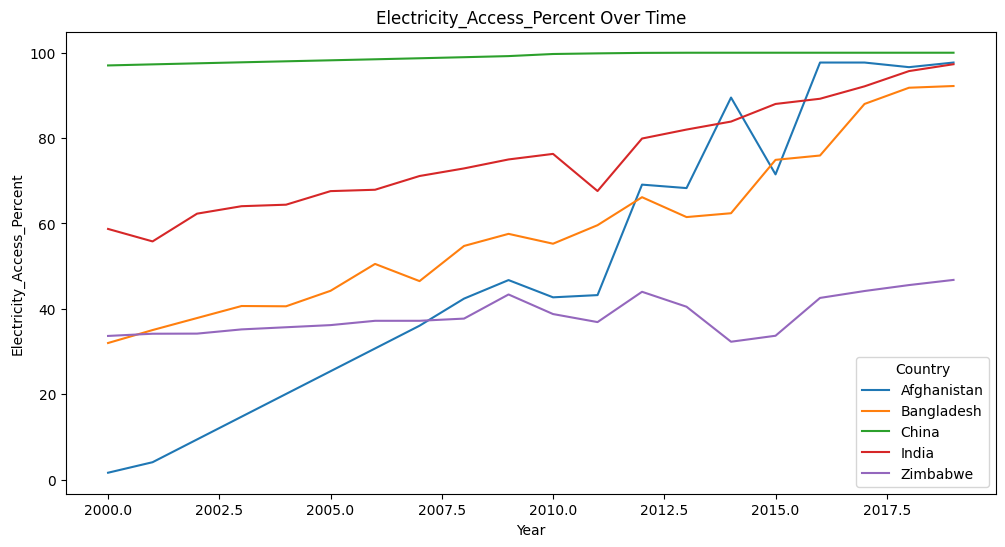

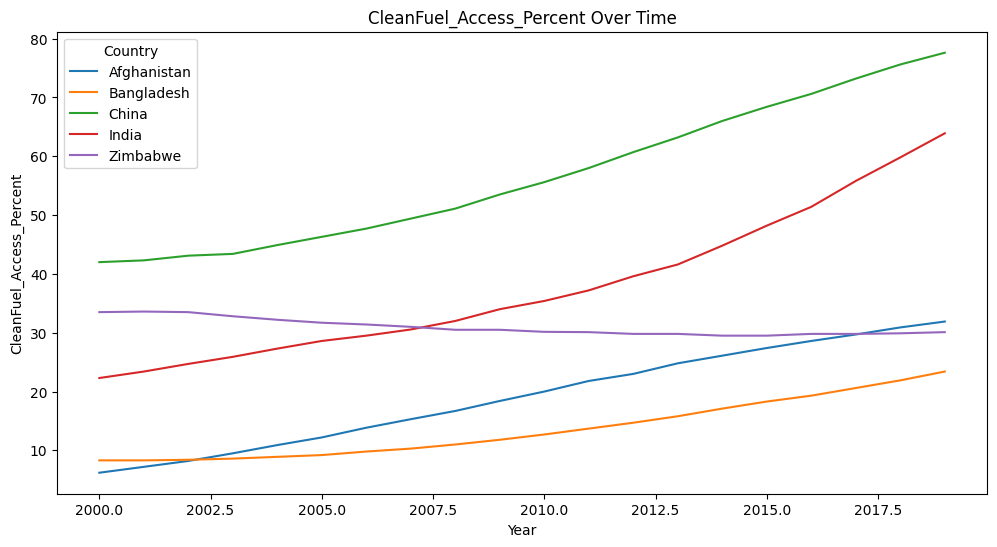

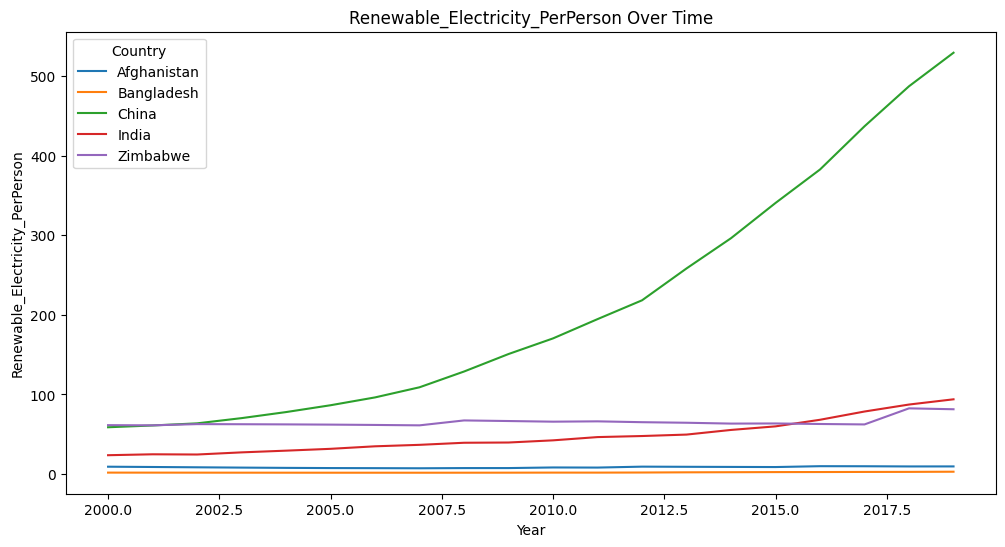

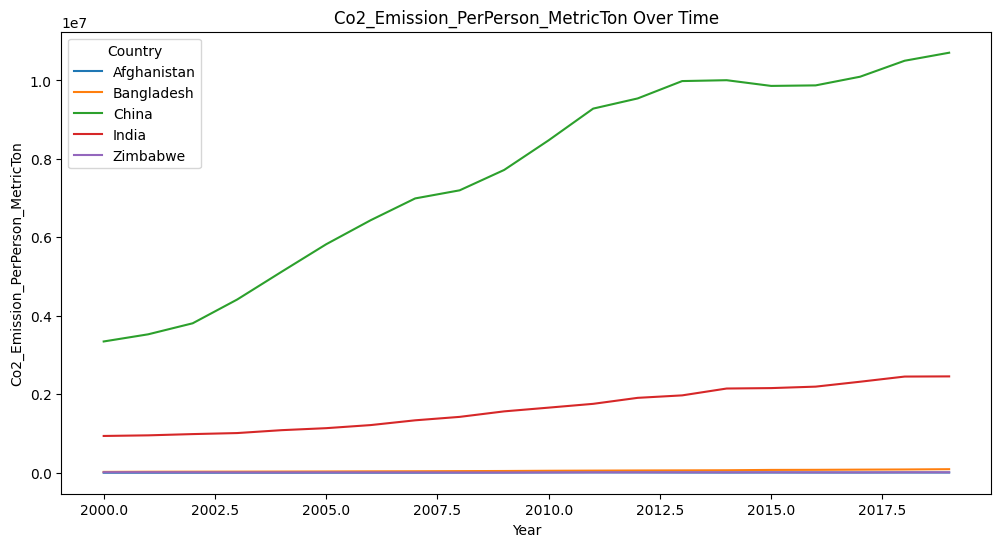

In [138]:
features_indicator = ['Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                               'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                              ]

for indicator in features_indicator:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_features_sustainable_energy_indicator, x='Year', y=indicator, hue='Country')
    plt.title(f'{indicator} Over Time')
    plt.show()

#### Step 2 Analyze Vital Aspects
#### We will focus on specific areas such as electricity access, renewable energy, carbon emissions, energy intensity, financial flows, and economic growth.

In [136]:
# Calculate summary statistics for the vital aspects
summary_stats = df_key_features[['Electricity_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon', 'LowCarbon_Electricity_Percent', 'Annual_GDP_Growth_Percent', 'GDP_PerPerson_Dollars']].describe()
summary_stats

,Electricity_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon,LowCarbon_Electricity_Percent,Annual_GDP_Growth_Percent,GDP_PerPerson_Dollars
count,3639.000000,2718.000000,3.221000e+03,3607.000000,3332.000000,3367.000000
mean,78.933702,113.137498,1.598665e+05,36.801182,3.441610,13283.774348
std,30.275541,244.167256,7.736611e+05,34.314884,5.686720,19709.866716
min,1.252269,0.000000,1.000000e+01,0.000000,-62.075920,111.927225
25%,59.800890,3.540000,2.020000e+03,2.877847,1.383302,1337.813437
50%,98.361570,32.910000,1.050000e+04,27.865068,3.559855,4578.633208
75%,100.000000,112.210000,6.058000e+04,64.403792,5.830099,15768.615365
max,100.000000,3060.190000,1.070722e+07,100.000010,123.139555,123514.196700


#### Step 3 Compare Nations and Track Progress 

#### We will compare different countries and track their progress towards Sustainable Development Goal 7.

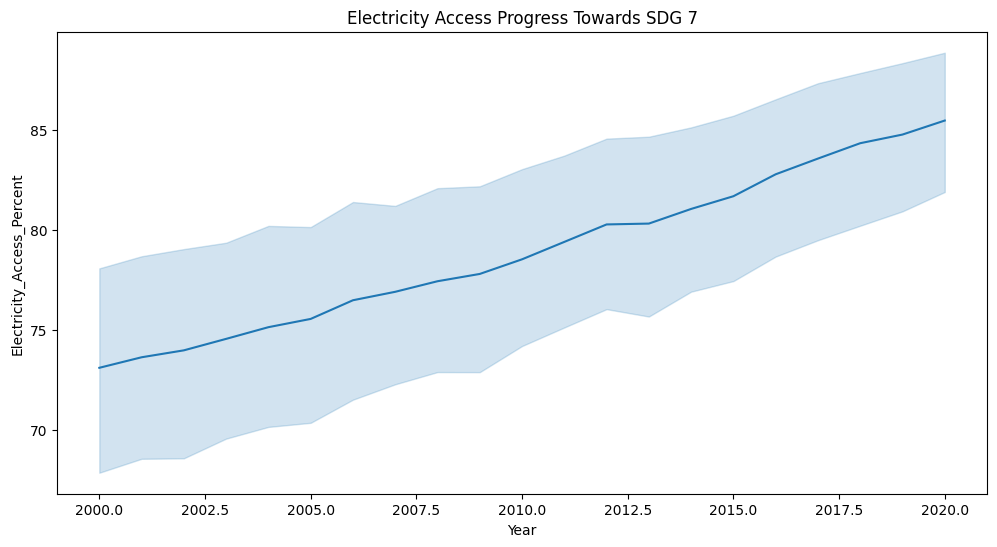

In [146]:
# Plotting the progress towards SDG 7
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_key_features, x='Year', y='Electricity_Access_Percent')
plt.title('Electricity Access Progress Towards SDG 7')
plt.show()

#### Step 4: Insights into Global Energy Consumption Patterns

#### We will identify trends and patterns in global energy consumption over time.

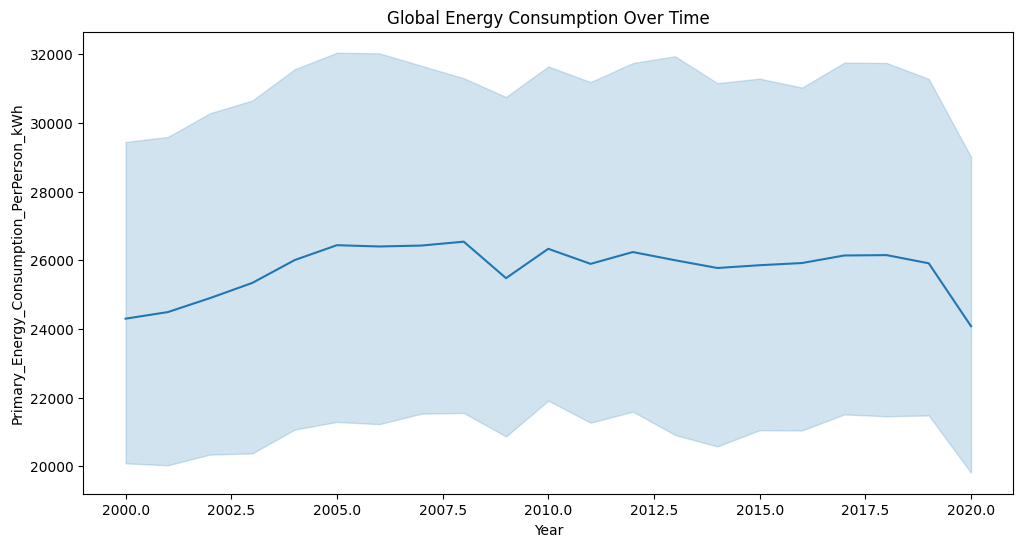

In [148]:
# Plot global energy consumption over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_key_features, x='Year', y='Primary_Energy_Consumption_PerPerson_kWh')
plt.title('Global Energy Consumption Over Time')
plt.show()

## Objective 2: Compare Nations and Track Progress

Built a time series model to track progress in electricity access, clean fuel access, 
renewable electricity per person, and CO2 emissions per person over the next four years



### Step 2: Data Processing 

In [121]:
# Features to be uses to built a Time Series Model
features_time_series = ''
df_features_time_series = ''

features_time_series = ['Year','Country', 
                               'Electricity_Access_Percent', 
                               'CleanFuel_Access_Percent',
                               'Renewable_Electricity_PerPerson',
                               'Co2_Emission_PerPerson_MetricTon'
                              ]


df_features_time_series = df_key_features.loc[:, features_time_series]

#Handle missing values
df_features_time_series.dropna(inplace=True)  # This modifies the original DataFrame
print(df_features_time_series.isna().sum())

Year                                0
Country                             0
Electricity_Access_Percent          0
CleanFuel_Access_Percent            0
Renewable_Electricity_PerPerson     0
Co2_Emission_PerPerson_MetricTon    0
dtype: int64


In [122]:
# Columns to consider for imputation
impute_features = ['Electricity_Access_Percent', 'CleanFuel_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon']

# Keep only the relevant columns for imputation
impute_df = df_features_time_series[impute_features]

# KNN imputation for missing values
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(impute_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=impute_features)

# Replace the original columns with the imputed values
df_features_time_series[impute_features] = imputed_df

# Check for any remaining missing values

df_features_time_series.dropna(inplace=True)  # This modifies the original DataFrame
print(df_features_time_series.isna().sum())
df_features_time_series

Year                                0
Country                             0
Electricity_Access_Percent          0
CleanFuel_Access_Percent            0
Renewable_Electricity_PerPerson     0
Co2_Emission_PerPerson_MetricTon    0
dtype: int64


,Year,Country,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
0,2000,Afghanistan,1.613591,6.2,9.22,760.000000
1,2001,Afghanistan,4.074574,7.2,8.86,730.000000
2,2002,Afghanistan,9.409158,8.2,8.47,1029.999971
3,2003,Afghanistan,14.738506,9.5,8.09,1220.000029
4,2004,Afghanistan,20.064968,10.9,7.75,1029.999971
...,...,...,...,...,...,...
2253,2012,Myanmar,33.700000,29.5,63.54,12430.000310
2254,2013,Myanmar,42.561730,29.8,62.88,11020.000460
2255,2014,Myanmar,44.178635,29.8,62.33,10340.000150
2256,2015,Myanmar,45.572647,29.9,82.53,12380.000110


## Step 2: Extract Relevant Features

Select the required features and ensure they are in the correct format.

In [123]:

df_features_time_series_cleaned = ''
# Ensure the 'Year' column is in datetime format
df_features_time_series['Year'] = pd.to_datetime(df_features_time_series['Year'], format='%Y')

# Set 'Year' as the index
df_features_time_series.set_index('Year', inplace=True)

# Select the relevant features
features = ['Electricity_Access_Percent', 'CleanFuel_Access_Percent', 'Renewable_Electricity_PerPerson', 'Co2_Emission_PerPerson_MetricTon']
df_features_time_series_cleaned = df_features_time_series[features]



In [124]:
df_features_time_series_cleaned

,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
Year,,,,
2000-01-01,1.613591,6.2,9.22,760.000000
2001-01-01,4.074574,7.2,8.86,730.000000
2002-01-01,9.409158,8.2,8.47,1029.999971
2003-01-01,14.738506,9.5,8.09,1220.000029
2004-01-01,20.064968,10.9,7.75,1029.999971
...,...,...,...,...
2012-01-01,33.700000,29.5,63.54,12430.000310
2013-01-01,42.561730,29.8,62.88,11020.000460
2014-01-01,44.178635,29.8,62.33,10340.000150


# Step 4: Resample the Data

Ensure the data is properly resampled if needed.

In [125]:
# Resample the data to annual frequency if needed
df_annual = df_features_time_series_cleaned.resample('Y').mean()
df_annual

,Electricity_Access_Percent,CleanFuel_Access_Percent,Renewable_Electricity_PerPerson,Co2_Emission_PerPerson_MetricTon
Year,,,,
2000-12-31,71.194833,52.743382,116.428235,71100.147014
2001-12-31,72.558972,54.607353,120.550294,78010.000261
2002-12-31,70.409061,53.305797,117.193623,75258.115489
2003-12-31,71.361771,54.048551,110.086957,80718.839920
2004-12-31,71.333847,53.575362,119.075072,82336.376571
2005-12-31,69.040379,51.737681,117.100870,83313.042508
2006-12-31,68.160705,50.984058,111.310290,77438.552073
2007-12-31,67.573366,49.509286,131.170857,76555.001138
2008-12-31,65.160280,48.985714,86.833000,72044.143432


# Step 5: Build a Pipeline

Create a pipeline with StandardScaler and ARIMA. Note that ARIMA models work on univariate time series, so we need to build separate models for each feature.

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to create and fit the ARIMA model
def fit_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Example function to create a pipeline for a feature
def create_pipeline_for_feature(series):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('arima', fit_arima_model(series, (5,1,0)))
    ])
    return pipeline

# Create pipelines for each feature
pipelines = {feature: create_pipeline_for_feature(df_annual[feature]) for feature in features}

print(pipelines)

{'Electricity_Access_Percent': Pipeline(steps=[('scaler', StandardScaler()),
                ('arima',
                 <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb019068b20>)]), 'CleanFuel_Access_Percent': Pipeline(steps=[('scaler', StandardScaler()),
                ('arima',
                 <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb018f6afa0>)]), 'Renewable_Electricity_PerPerson': Pipeline(steps=[('scaler', StandardScaler()),
                ('arima',
                 <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb016f0f550>)]), 'Co2_Emission_PerPerson_MetricTon': Pipeline(steps=[('scaler', StandardScaler()),
                ('arima',
                 <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x7fb016f0f340>)])}


# Step 6: Train the Model

Fit the model on the training data.

In [128]:
# Fit the models for each feature
models = {}
for feature, pipeline in pipelines.items():
    # Standardize the feature
    scaled_feature = pipeline.named_steps['scaler'].fit_transform(df_annual[[feature]].values)
    # Fit the ARIMA model
    models[feature] = fit_arima_model(scaled_feature, (5,1,0))


# Step 7: Forecast Future Values

Predict future values for the next four years.

In [129]:
# Number of periods to forecast
n_periods = 4

# Forecast future values for each feature
forecasts = {}
for feature, model in models.items():
    forecast = model.forecast(steps=n_periods)
    forecasts[feature] = forecast


# Step 8: Evaluate the Model

Assess the performance of the model on the historical data (optional step for initial assessment).

In [130]:
# Example evaluation of one model
from sklearn.metrics import mean_squared_error

feature = 'Electricity_Access_Percent'
train_size = int(len(df_annual) * 0.8)
train, test = df_annual[feature][:train_size], df_annual[feature][train_size:]

model = models[feature]
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error for {feature}: {mse}')


Mean Squared Error for Electricity_Access_Percent: 4590.304695392115


# Step 9: Visualize the Results

Plot the historical and forecasted values to visualize the progress

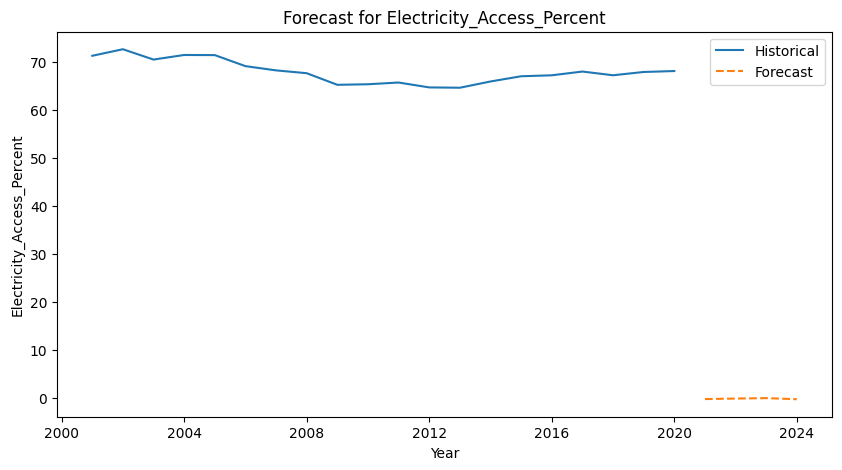

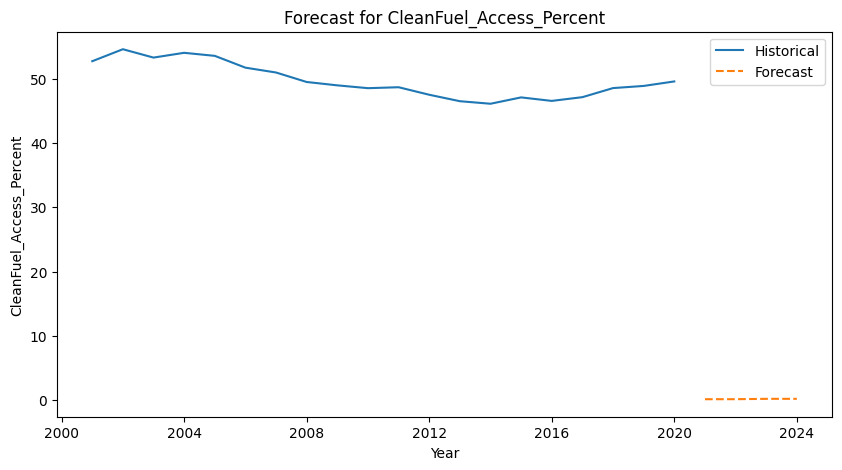

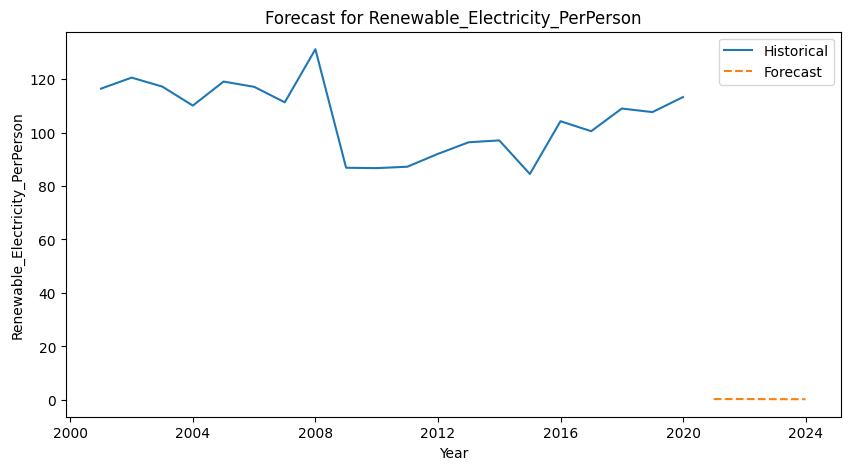

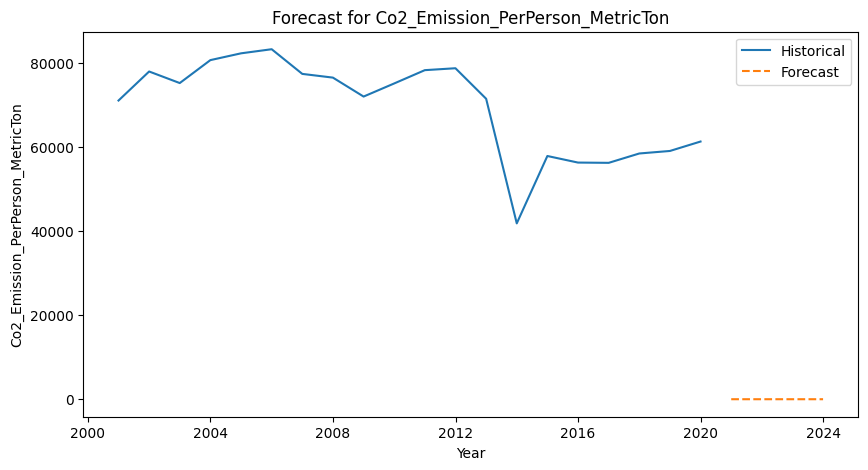

In [131]:
import matplotlib.pyplot as plt

# Plot the historical and forecasted values for each feature
for feature, forecast in forecasts.items():
    plt.figure(figsize=(10, 5))
    plt.plot(df_annual[feature], label='Historical')
    plt.plot(pd.date_range(start=df_annual.index[-1], periods=n_periods+1, freq='Y')[1:], forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


# Support Vector Machines

### Step 3: Feature Selection

Choose the relevant features for the classification task.

In [92]:
# Select the relevant features
features = [
    'Year', 
    'Country', 
    'Renewable_Energy_Consumption_AgainstTotalEnergy_Percent'
]
df_features_svc = df_key_features[features].dropna().reset_index()
df_features_svc.isnull().sum()

index                                                      0
Year                                                       0
Country                                                    0
Renewable_Energy_Consumption_AgainstTotalEnergy_Percent    0
dtype: int64

# Step 4: Label Creation

Create a binary target variable indicating a classification task. For example, let's create a binary target variable indicating whether a country's renewable energy consumption is above or below the median.

In [98]:
# Create a binary target variable
median_renewable_energy = df_features_svc['Renewable_Energy_Consumption_AgainstTotalEnergy_Percent'].median()
df_features_svc['High_Renewable_Energy'] = (df_features_svc['Renewable_Energy_Consumption_AgainstTotalEnergy_Percent'] > median_renewable_energy).astype(int)

# Target variable
target = 'High_Renewable_Energy'
df_features_svc

,index,Year,Country,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,High_Renewable_Energy
0,42,0,0,0.053235,0
1,43,1,0,0.065218,0
2,44,2,0,0.051677,0
3,45,3,0,0.228104,0
4,46,4,0,0.206787,0
...,...,...,...,...,...
1507,3560,16,71,3.567936,0
1508,3561,17,71,3.972285,0
1509,3562,18,71,2.927033,0
1510,3563,19,71,3.197033,0


# Step 5: Train-Test Split

Split the data into training and testing sets.

In [99]:
from sklearn.model_selection import train_test_split

# Encode 'Country' and 'Year' as categorical variables
df_features_svc['Country'] = df_features_svc['Country'].astype('category').cat.codes
df_features_svc['Year'] = df_features_svc['Year'].astype('category').cat.codes
df_features_svc

,index,Year,Country,Renewable_Energy_Consumption_AgainstTotalEnergy_Percent,High_Renewable_Energy
0,42,0,0,0.053235,0
1,43,1,0,0.065218,0
2,44,2,0,0.051677,0
3,45,3,0,0.228104,0
4,46,4,0,0.206787,0
...,...,...,...,...,...
1507,3560,16,71,3.567936,0
1508,3561,17,71,3.972285,0
1509,3562,18,71,2.927033,0
1510,3563,19,71,3.197033,0


In [100]:

# Split the data

X = df_features_svc.drop(columns=target)
y = df_features_svc[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Build and Train the SVM Model

Train the SVM model using the training data.

In [101]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C=1))
])

# Train the model
pipeline.fit(X_train, y_train)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=1, kernel='linear'))])


# Step 7: Evaluate the Model

Assess the performance of the model on the test set.

Accuracy: 0.9900990099009901
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       153

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303



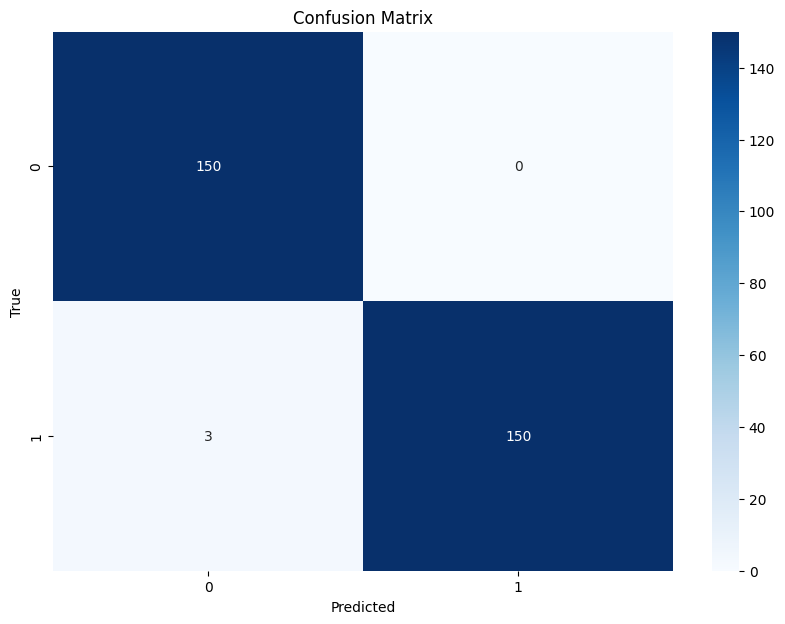

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Step 5: Model Training with GridSearchCV

Use GridSearchCV to find the best hyperparameters for each model.

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for each model
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

param_grid_logreg = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

param_grid_svc = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Create pipelines for each model
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Create GridSearchCV objects for each model
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy')

# Fit the models
grid_knn.fit(X_train, y_train)
grid_logreg.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)


/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

# Step 6: Model Comparison

Compare the performance of the different models.

In [104]:
# Print the best parameters and scores for each model
print(f"KNN Best Params: {grid_knn.best_params_}, Best Score: {grid_knn.best_score_}")
print(f"Logistic Regression Best Params: {grid_logreg.best_params_}, Best Score: {grid_logreg.best_score_}")
print(f"SVC Best Params: {grid_svc.best_params_}, Best Score: {grid_svc.best_score_}")


KNN Best Params: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}, Best Score: 0.9611227324165839
Logistic Regression Best Params: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}, Best Score: 0.9975206611570246
SVC Best Params: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}, Best Score: 0.9950413223140495


# Step 7: Evaluate the Models

Assess the performance of the models on the test set.

In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred_knn = grid_knn.predict(X_test)
y_pred_logreg = grid_logreg.predict(X_test)
y_pred_svc = grid_svc.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'KNN Test Accuracy: {accuracy_knn}')
print(f'Logistic Regression Test Accuracy: {accuracy_logreg}')
print(f'SVC Test Accuracy: {accuracy_svc}')

# Print classification reports
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))


KNN Test Accuracy: 0.9834983498349835
Logistic Regression Test Accuracy: 1.0
SVC Test Accuracy: 0.9966996699669967
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       150
           1       1.00      0.97      0.98       153

    accuracy                           0.98       303
   macro avg       0.98      0.98      0.98       303
weighted avg       0.98      0.98      0.98       303

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       153

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       1.00  

# Step 8: Visualize the Results

Plot the confusion matrix and other relevant evaluation metrics to visualize the results.

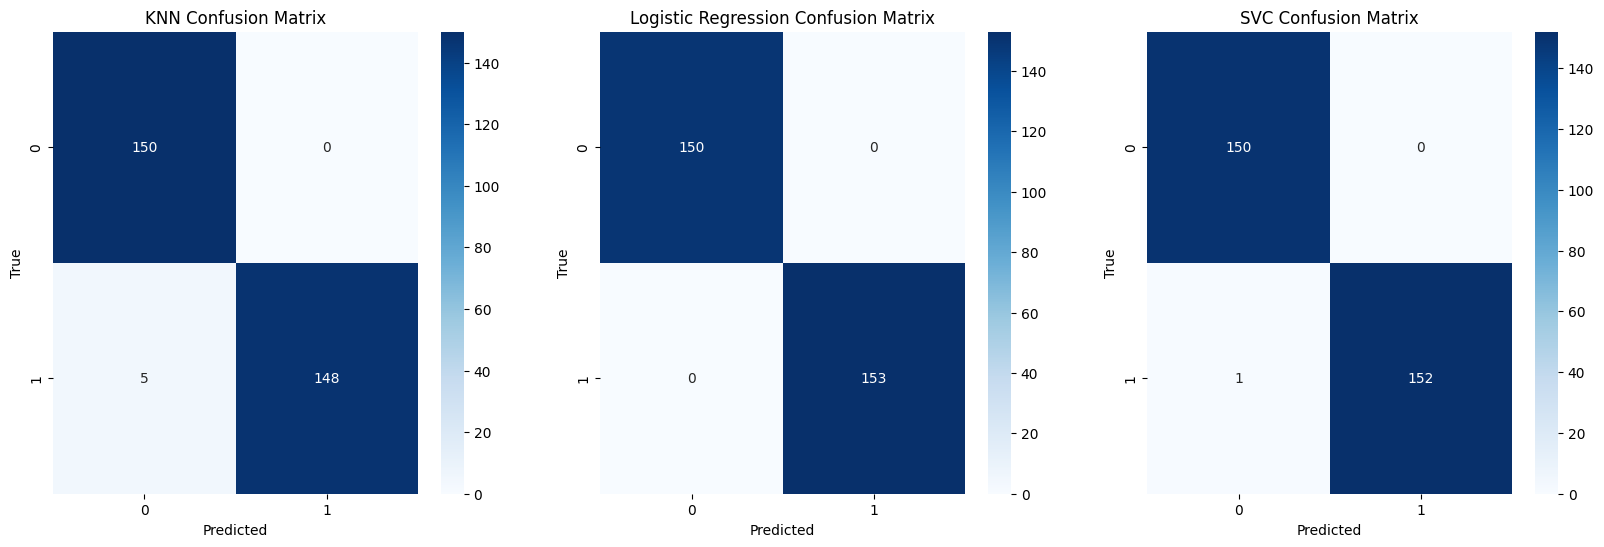

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for each model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrices
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


In [107]:
# Let's first ensure we have all the metrics we need from our GridSearchCV results:

In [109]:
# Extract train scores (best cross-validation scores) and average fit times from GridSearchCV results
train_score_knn = grid_knn.best_score_
train_score_logreg = grid_logreg.best_score_
train_score_svc = grid_svc.best_score_

# Extract the mean fit time from GridSearchCV results
mean_fit_time_knn = grid_knn.cv_results_['mean_fit_time'][grid_knn.best_index_]
mean_fit_time_logreg = grid_logreg.cv_results_['mean_fit_time'][grid_logreg.best_index_]
mean_fit_time_svc = grid_svc.cv_results_['mean_fit_time'][grid_svc.best_index_]

# Calculate test scores using the best estimator on the test set
test_score_knn = accuracy_score(y_test, grid_knn.predict(X_test))
test_score_logreg = accuracy_score(y_test, grid_logreg.predict(X_test))
test_score_svc = accuracy_score(y_test, grid_svc.predict(X_test))
print(test_score_knn)


0.9834983498349835


In [110]:
# Now, we'll construct a DataFrame with the gathered metrics.

In [111]:
import pandas as pd

# Construct the DataFrame
model_results = pd.DataFrame({
    'model': ['KNN', 'Logistic Regression', 'SVC'],
    'train score': [train_score_knn, train_score_logreg, train_score_svc],
    'test score': [test_score_knn, test_score_logreg, test_score_svc],
    'average fit time': [mean_fit_time_knn, mean_fit_time_logreg, mean_fit_time_svc]
})

# Display the DataFrame
print(model_results)


                 model  train score  test score  average fit time
0                  KNN     0.961123    0.983498          0.002988
1  Logistic Regression     0.997521    1.000000          0.016876
2                  SVC     0.995041    0.996700          0.008010


In [53]:
#We will compare different countries and track their progress towards Sustainable Development Goal 7.

# Plotting the progress towards SDG 7
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Electricity_Access', hue='Country')
plt.title('Electricity Access Progress Towards SDG 7')
plt.show()


ValueError: Could not interpret value `Electricity_Access` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

### Step 5: Insights into Global Energy Consumption Patterns

In [54]:
# We will identify trends and patterns in global energy consumption over time.

# Plot global energy consumption over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Energy_Consumption')
plt.title('Global Energy Consumption Over Time')
plt.show()


ValueError: Could not interpret value `Energy_Consumption` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

### build a regression model for CO2 emissions

### Data Preprocessing

In [317]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values
df = df.dropna(subset=['co2_emission','Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity', 'gdp_per_capita']).reset_index()  
# Dropping rows where CO2 Emissions is missing
df
# Handle other missing values appropriately
# For simplicity, let's fill missing numerical values with the median
#numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
#df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())


KeyError: ['co2_emission', 'Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity']

### use k-nearest to handle missing data for the feature 'CO2 Emissions (kt)'

In [318]:

# Columns to consider for imputation
impute_features = ['co2_emission', 'Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity', 'gdp_per_capita']

# Keep only the relevant columns for imputation
impute_df = df[impute_features]
impute_df

KeyError: "['co2_emission', 'Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity'] not in index"

### KNN Imputation

In [128]:
# Use KNN to fill missing values for the 'CO2 Emissions (kt)' feature.

from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(impute_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=impute_features)
imputed_df
# Replace the original 'CO2 Emissions (kt)' column with the imputed values
df['co2_emission'] = imputed_df['co2_emission']
df

,level_0,index,Country,Year,Electricity_Access,Fuel_Access,Renewable_Electricity_PerCapita,Financial_Aid,Renewable_Energy_Share,Electricity from fossil fuels (TWh),...,Primary energy consumption per capita (kWh/person),Energy_Intensity,co2_emission,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,2,2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
1,3,3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
2,4,4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
3,5,5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.939110,67.709953
4,6,6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,3216,3216,Switzerland,2008,100.000000,100.00,NaN,NaN,19.55,3.04,...,47155.75000,2.19,12430.000310,29.249441,2.755511,74572.232370,219,41277.0,46.818188,8.227512
2768,3217,3217,Switzerland,2009,100.000000,100.00,NaN,NaN,19.97,3.00,...,46436.27300,2.25,11020.000460,28.932710,-2.079633,72083.167700,219,41277.0,46.818188,8.227512
2769,3218,3218,Switzerland,2010,100.000000,100.00,NaN,NaN,20.56,3.32,...,44714.96500,2.11,10340.000150,29.882568,3.268102,77117.126010,219,41277.0,46.818188,8.227512
2770,3219,3219,Switzerland,2011,100.000000,100.00,NaN,NaN,20.57,3.34,...,41971.25400,2.00,12380.000110,28.442818,1.920446,91254.034760,219,41277.0,46.818188,8.227512


### Feature Selection

In [129]:
# Select relevant features that might influence CO2 emissions.

In [319]:
# Selecting features that are likely to influence CO2 emissions
features = ['Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity', 'gdp_per_capita']
target = 'co2_emission'

X = df[features]
y = df[target]


KeyError: "['Electricity_Access', 'Renewable_Energy_Share', 'Energy_Intensity'] not in index"

### Train-Test Split

In [131]:
# Split the data into training and testing sets.

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training

In [132]:
# Train a regression model. Here, we'll use a Linear Regression model.

In [133]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [134]:
### Model Evaluation

In [135]:
# Evaluate the model’s performance using metrics such as R² score and Mean Absolute Error (MAE).

from sklearn.metrics import r2_score, mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2}')
print(f'Mean Absolute Error: {mae}')


R² Score: -0.02772974977081244
Mean Absolute Error: 242385.84646804194


In [136]:
# Train Lasso, and Ridge regression models.

In [137]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialize the models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Train the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.1)

In [138]:
# Evaluate the performance of the three models using metrics such as R² score and Mean Absolute Error (MAE).
from sklearn.metrics import r2_score, mean_absolute_error

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f'Linear Regression - R² Score: {r2_linear}, MAE: {mae_linear}')
print(f'Lasso Regression - R² Score: {r2_lasso}, MAE: {mae_lasso}')
print(f'Ridge Regression - R² Score: {r2_ridge}, MAE: {mae_ridge}')


Linear Regression - R² Score: -0.02772974977081244, MAE: 242385.84646804194
Lasso Regression - R² Score: -0.027729744057957806, MAE: 242385.84717432378
Ridge Regression - R² Score: -0.02772969860452723, MAE: 242385.85340573773


### using KNN algorithm, can you find out which country has the lowest CO2 emission ?

In [139]:
# Train the KNN Model

In [140]:
# Train the KNN model using the selected features.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [141]:
# Predict the Country with the Lowest CO2 Emissions

In [142]:
# Use the trained model to find the country with the lowest CO2 emissions.

# Predict the CO2 emissions for the test set
y_pred = knn_model.predict(X_test_scaled)

# Create a DataFrame to compare the actual and predicted values
results = pd.DataFrame({'Country': df['Country'][X_test.index], 'Actual CO2 Emissions (kt)': y_test, 'Predicted CO2 Emissions (kt)': y_pred})

# Find the country with the lowest CO2 emissions
lowest_co2_country = results.loc[results['Predicted CO2 Emissions (kt)'].idxmin()]

print(f"Country with the lowest predicted CO2 emissions: {lowest_co2_country['Country']}")
print(f"Actual CO2 Emissions (kt): {lowest_co2_country['Actual CO2 Emissions (kt)']}")
print(f"Predicted CO2 Emissions (kt): {lowest_co2_country['Predicted CO2 Emissions (kt)']}")


Country with the lowest predicted CO2 emissions: Pakistan
Actual CO2 Emissions (kt): 79.99999821
Predicted CO2 Emissions (kt): 68.00000056799999


In [144]:
### build a time series model to gain profound insights into global energy consumption patterns over time

In [145]:
# Feature Selection

In [156]:
# Select the relevant feature for the time series analysis.

# Set the 'Year' column as the index
#df = df.dropna(subset=['Year']).reset_index()  # Dropping rows where CO2 Emissions is missing

#df.set_index('Year', inplace=True)

# Select the 'Energy Consumption (Mtoe)' feature
energy_consumption = df['energy_consumption']
df

,level_0,index,Country,Electricity_Access,Fuel_Access,Renewable_Electricity_PerCapita,Financial_Aid,Renewable_Energy_Share,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,energy_consumption,Energy_Intensity,co2_emission,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,,,
2002,2,2,Afghanistan,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.00,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
2003,3,3,Afghanistan,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.00,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
2004,4,4,Afghanistan,20.064968,10.90,7.75,NaN,44.24,0.33,0.00,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
2005,5,5,Afghanistan,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.00,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.939110,67.709953
2006,6,6,Afghanistan,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.00,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,3216,3216,Switzerland,100.000000,100.00,NaN,NaN,19.55,3.04,26.27,...,47155.75000,2.19,12430.000310,29.249441,2.755511,74572.232370,219,41277.0,46.818188,8.227512
2009,3217,3217,Switzerland,100.000000,100.00,NaN,NaN,19.97,3.00,26.27,...,46436.27300,2.25,11020.000460,28.932710,-2.079633,72083.167700,219,41277.0,46.818188,8.227512
2010,3218,3218,Switzerland,100.000000,100.00,NaN,NaN,20.56,3.32,25.20,...,44714.96500,2.11,10340.000150,29.882568,3.268102,77117.126010,219,41277.0,46.818188,8.227512


In [157]:
### Time Series Analysis

In [158]:
# Explore and analyze the time series data.

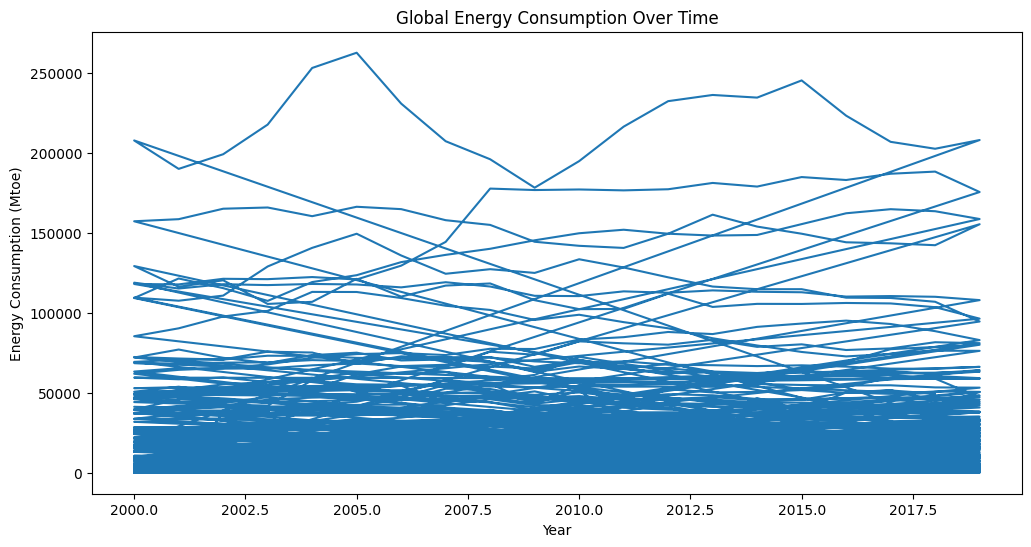

In [159]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(energy_consumption)
plt.title('Global Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Mtoe)')
plt.show()


### Model Training

In [160]:
# Train a time series model. Here, we'll use the ARIMA model.

In [166]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(energy_consumption)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is not stationary, difference it
energy_consumption_diff = energy_consumption.diff().dropna()

# Train the ARIMA model
model = ARIMA(energy_consumption_diff, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


ADF Statistic: -8.037789536227901
p-value: 1.8822353144414333e-12


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                 2771
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -29750.285
Date:                Tue, 30 Jul 2024   AIC                          59506.569
Time:                        20:34:19   BIC                          59524.349
Sample:                             0   HQIC                         59512.990
                               - 2771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0001      0.023     -0.007      0.995      -0.045       0.044
ma.L1         -1.0000      0.003   -294.804      0.000      -1.007      -0.993
sigma2       1.25e+08   2.71e-11    4.6e+18      0.0

### Model Evaluation

In [168]:
# Evaluate the model’s performance.

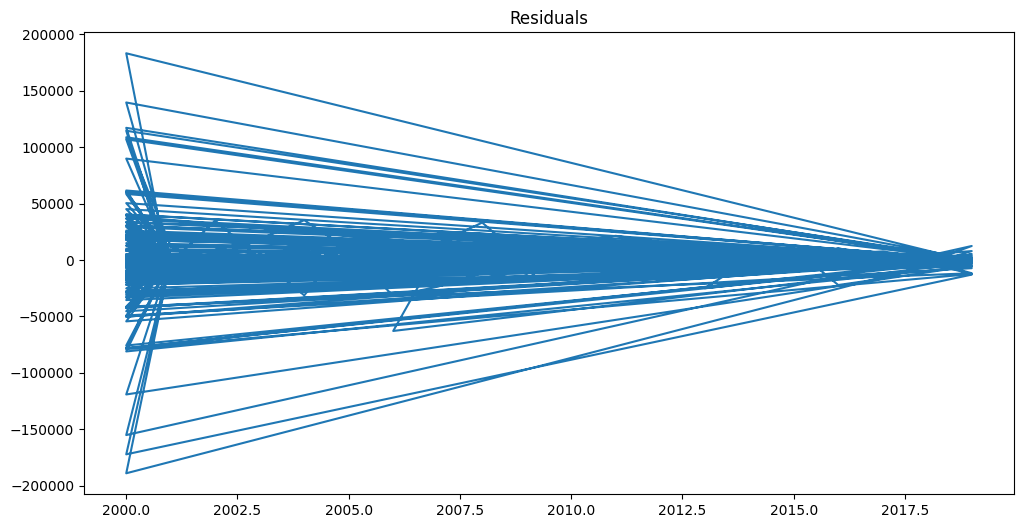

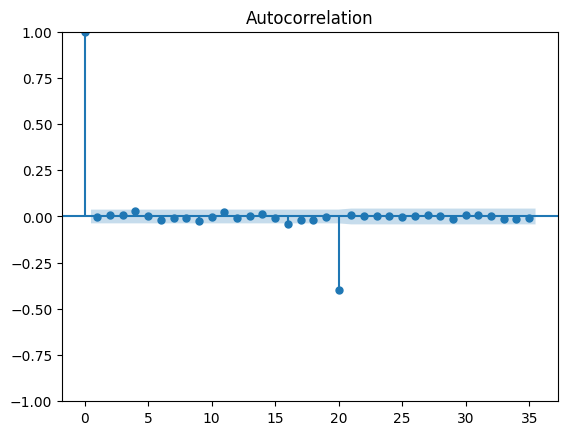

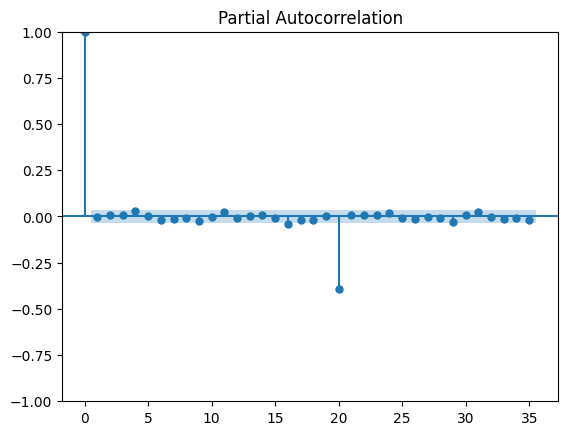

In [169]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot the ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals)
plot_pacf(residuals)
plt.show()


### Insights Extraction

In [171]:
# Gain insights into global energy consumption patterns.

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


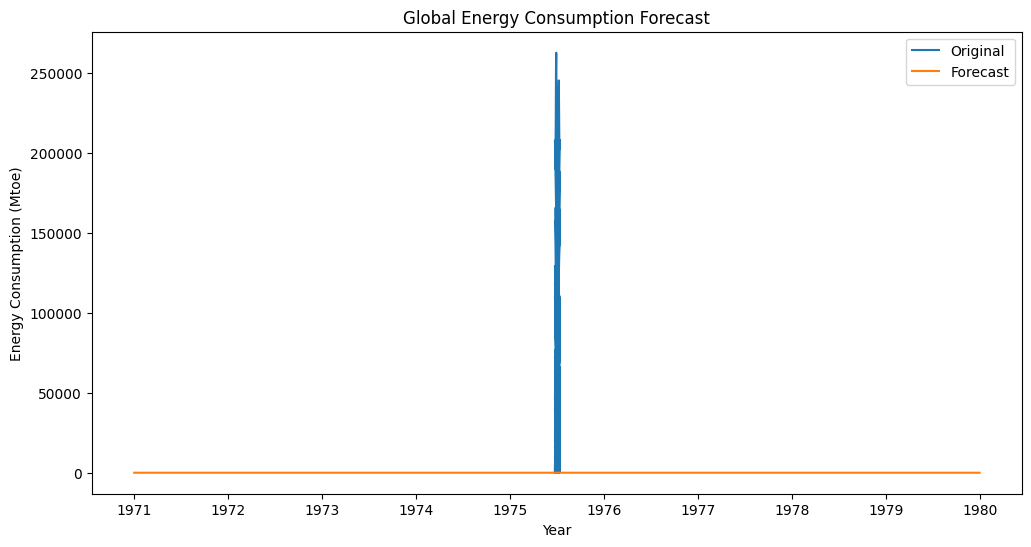

In [178]:
# Forecast future energy consumption
forecast = model_fit.forecast(steps=10)#[0]


# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(energy_consumption, label='Original')
plt.plot(pd.date_range(start=energy_consumption.index[-1], periods=10, freq='Y'), forecast, label='Forecast')
plt.title('Global Energy Consumption Forecast')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (Mtoe)')
plt.legend()
plt.show()


### using logistic regression compare nations, track progress towards Sustainable 

In [201]:
# Convert 'Year' to datetime format
df.iloc[0:]
#df['Year'] = pd.to_datetime(df.iloc[0], format='%Y')


,level_0,index,Country,Electricity_Access,Fuel_Access,Renewable_Electricity_PerCapita,Financial_Aid,Renewable_Energy_Share,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,energy_consumption,Energy_Intensity,co2_emission,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,,,
2002,2,2,Afghanistan,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.00,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
2003,3,3,Afghanistan,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.00,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
2004,4,4,Afghanistan,20.064968,10.90,7.75,NaN,44.24,0.33,0.00,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
2005,5,5,Afghanistan,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.00,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.939110,67.709953
2006,6,6,Afghanistan,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.00,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,3216,3216,Switzerland,100.000000,100.00,NaN,NaN,19.55,3.04,26.27,...,47155.75000,2.19,12430.000310,29.249441,2.755511,74572.232370,219,41277.0,46.818188,8.227512
2009,3217,3217,Switzerland,100.000000,100.00,NaN,NaN,19.97,3.00,26.27,...,46436.27300,2.25,11020.000460,28.932710,-2.079633,72083.167700,219,41277.0,46.818188,8.227512
2010,3218,3218,Switzerland,100.000000,100.00,NaN,NaN,20.56,3.32,25.20,...,44714.96500,2.11,10340.000150,29.882568,3.268102,77117.126010,219,41277.0,46.818188,8.227512


### Vector Machines

In [348]:
df_working_vector = df_working_copy.loc[:,['Year', 'Country', 'Renewable_Electricity_PerCapita',
                  'Energy_Intensity', 'gdp_per_capita']]
#df_working_vector ['Year', 'Country', 'Renewable_Electricity_PerCapita', 'Renewable_Electricity_Share_Percent'
                  # 'Energy_Intensity', 'gdp_per_capita']
    
df_working_vector

,Year,Country,Renewable_Electricity_PerCapita,Energy_Intensity,gdp_per_capita
0,2000,Afghanistan,9.22,1.64,NaN
1,2001,Afghanistan,8.86,1.74,NaN
2,2002,Afghanistan,8.47,1.40,179.426579
3,2003,Afghanistan,8.09,1.40,190.683814
4,2004,Afghanistan,7.75,1.20,211.382074
...,...,...,...,...,...
3644,2016,Zimbabwe,62.88,10.00,1464.588957
3645,2017,Zimbabwe,62.33,9.51,1235.189032
3646,2018,Zimbabwe,82.53,9.83,1254.642265
3647,2019,Zimbabwe,81.40,10.47,1316.740657


In [349]:


# Columns to consider for imputation
impute_features = ['Renewable_Electricity_PerCapita','Energy_Intensity', 'gdp_per_capita']


In [352]:
# Keep only the relevant columns for imputation
impute_df = df_working_vector[impute_features]

# KNN imputation for missing values
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(impute_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=impute_features)

# Replace the original columns with the imputed values
df_working_vector[impute_features] = imputed_df

# Check for any remaining missing values
#print(df_working_vector.isnull().sum())
df_working_vector

,Year,Country,Renewable_Electricity_PerCapita,Energy_Intensity,gdp_per_capita
0,2000,Afghanistan,9.22,1.64,91019.261842
1,2001,Afghanistan,8.86,1.74,85168.211752
2,2002,Afghanistan,8.47,1.40,179.426579
3,2003,Afghanistan,8.09,1.40,190.683814
4,2004,Afghanistan,7.75,1.20,211.382074
...,...,...,...,...,...
3644,2016,Zimbabwe,62.88,10.00,1464.588957
3645,2017,Zimbabwe,62.33,9.51,1235.189032
3646,2018,Zimbabwe,82.53,9.83,1254.642265
3647,2019,Zimbabwe,81.40,10.47,1316.740657


In [353]:
# Selecting features that are likely to influence progress towards sustainability
features = ['Renewable_Electricity_PerCapita','Energy_Intensity', 'gdp_per_capita']


# Create a binary target variable
threshold = 30
df_working_vector['Progress'] = (df_working_vector['Renewable_Electricity_Share_Percent'] > threshold).astype(int)

# Target variable
target = 'Progress'

KeyError: 'Renewable_Electricity_Share_Percent'

In [289]:
# Split the data into training and testing sets.

# Split the data
X = df_working_copy[features]
y = df_working_copy[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


TypeError: Singleton array array(<bound method DataFrame.reset_index of       Electricity_Access  Renewable_Electricity_PerCapita  gdp_per_capita
0               1.613591                             9.22             NaN
1               4.074574                             8.86             NaN
2               9.409158                             8.47      179.426579
3              14.738506                             8.09      190.683814
4              20.064968                             7.75      211.382074
...                  ...                              ...             ...
3644           42.561730                            62.88     1464.588957
3645           44.178635                            62.33     1235.189032
3646           45.572647                            82.53     1254.642265
3647           46.781475                            81.40     1316.740657
3648           52.747670                            80.61     1214.509820

[3649 rows x 3 columns]>, dtype=object) cannot be considered a valid collection.

In [286]:
# KNN

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

print(f'KNN Best Parameters: {knn_best_params}')
print(f'KNN Best Score: {knn_best_score}')


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 233, in fit
    return self._fit(X, y)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 456, in _fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 957, in check_array
    _assert_all_finite(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
